In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data = pd.read_csv("marks.csv")

In [5]:
#Exploratory Data Analysis

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.shape

(25, 2)

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Data Visualization

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

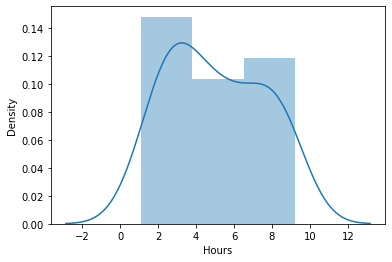

In [10]:
sns.distplot(data['Hours'],kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

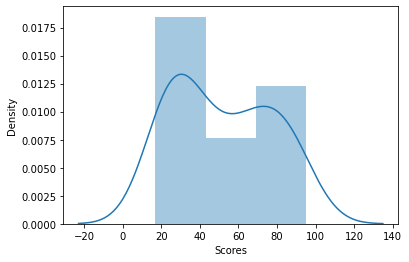

In [12]:
sns.distplot(data['Scores'],kde=True)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

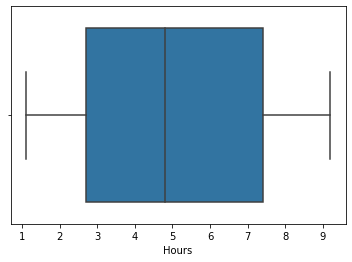

In [14]:
sns.boxplot(data['Hours'])

<AxesSubplot:>

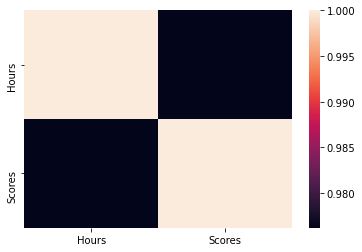

In [15]:
sns.heatmap(data.corr())

In [16]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


[Text(0.5, 1.0, 'hours vs scores regression')]

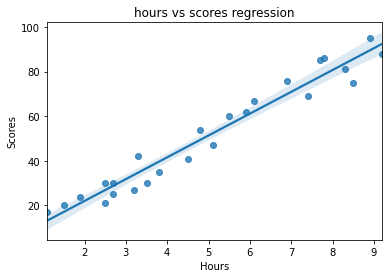

In [17]:
sns.regplot(x="Hours",y="Scores",data=data).set(title="hours vs scores regression")

In [18]:
#Model Implementation

In [20]:
x = data.iloc[:,:-1].values

In [21]:
y = data.iloc[:,-1].values

In [22]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [23]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
print("Training set contains {} data".format(len(x_train)))

Training set contains 20 data


In [26]:
print("Test set contains {} data".format(len(x_test)))

Test set contains 5 data


In [29]:
lrm = LinearRegression()

In [30]:
lrm.fit(x_train,y_train)

LinearRegression()

In [ ]:
#Checking Accuracy Of Model

In [33]:
train_pred = lrm.predict(x_train)
train_score = metrics.r2_score(y_train,train_pred)
train_score

0.9515510725211552

In [34]:
y_pred = lrm.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [36]:
actual_vs_pred = pd.DataFrame({'yest_test':y_test,'y_pred':y_pred,'residual':abs(y_test-y_pred)})
actual_vs_pred

,yest_test,y_pred,residual
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [37]:
coeficient=lrm.coef_
intercept=lrm.intercept_

In [39]:
print("Coefficient : "+str(coeficient))

Coefficient : [9.91065648]


In [40]:
print("Intercept : "+str(intercept))

Intercept : 2.018160041434683


In [41]:
#Calculating R2 Score Of The Predicted Values Of Test Data
pred_score = metrics.r2_score(y_test,y_pred)
pred_score

0.9454906892105356

In [44]:
#Actual Prediction
hours = [12]
score= lrm.predict([hours])
print("Score : {}".format(round(score[0],2)))

Score : 120.95
